<a href="https://colab.research.google.com/github/Tommy3072/MineriaDeDatos/blob/main/Taller4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['balance_control', 'duracion_prestamo', 'historial_credito',
       'proposito', 'monto', 'saldo_ahorro', 'longitud_empleo',
       'tasa_instalacion', 'estado_personal', 'otros_deudores',
       'residencia_hist', 'propiedad', 'edad', 'plan_instalacion',
       'alojamiento', 'creditos_existentes', 'dependientes', 'telefono',
       'trabajador_extranjero', 'trabajo', 'incumplimiento'],
      dtype='object')
balance_control             2.577
duracion_prestamo          20.903
historial_credito           2.369
proposito                   4.870
monto                    3271.258
saldo_ahorro                2.175
longitud_empleo             2.620
tasa_instalacion            2.973
estado_personal             3.138
otros_deudores              2.866
residencia_hist             2.845
propiedad                   2.358
edad                       35.546
plan_instalacion            1.908
alojamiento                 2.071
creditos_existentes         1.407
dependientes                1.155
te

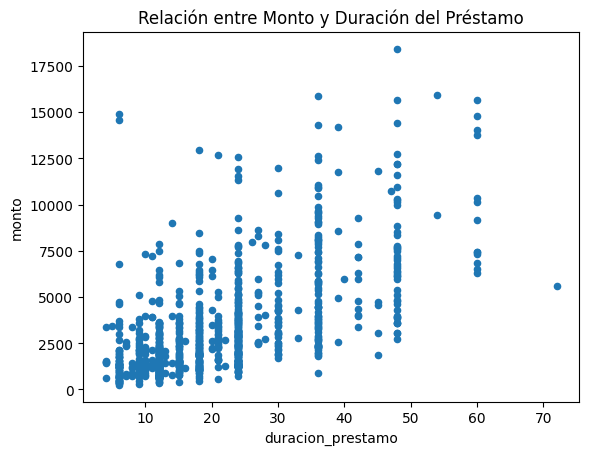

[4,11]=165
[11,18]=253
[18,25]=224
[25,32]=57
[32,39]=86
[39,46]=17
[46,53]=49
[53,60]=2
[60,67]=0
[67,74]=1
         X    Y
0   [4,11]  165
1  [11,18]  253
2  [18,25]  224
3  [25,32]   57
4  [32,39]   86
5  [39,46]   17
6  [46,53]   49
7  [53,60]    2
8  [60,67]    0
9  [67,74]    1
0.003549883987364815


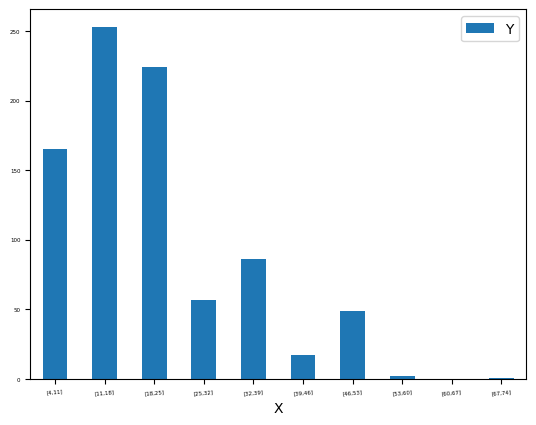

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

df = pd.read_csv("credito.csv")

# Ver las columnas disponibles
print(df.columns)

# Promedio
promedios = df.mean()
print(promedios)
print(df[['duracion_prestamo', 'monto']].mean())

# Desviación estándar
standard_dev = df.std()
print(standard_dev)
print(df[['duracion_prestamo', 'monto']].std())

# Máximo y mínimo
max = df.max()
print(max)
print(df[['duracion_prestamo', 'monto']].max())
min = df.min()
print(min)
print(df[['duracion_prestamo', 'monto']].min())

# La fila que corresponde al máximo/mínimo
print(df[df['duracion_prestamo'] == df['duracion_prestamo'].max()])
print(df[df['duracion_prestamo'] == df['duracion_prestamo'].min()])

# Sumas
sum = df.sum()
print(sum)
print(df[['duracion_prestamo', 'monto']].sum())

# Medianas
medians = df.median()
print(medians)
print(df[['duracion_prestamo', 'monto']].median())

# Coeficiente de variación
for name, values in df.items():
    coef_variacion = df[name].std() / df[name].mean()
    print("Coef. Variacion " + str(name) + ": " + str(coef_variacion))

# Coeficiente de asimetría
for name, values in df.items():
    dev_std_3 = df[name].std() * df[name].std() * df[name].std()
    promedio = df[name].mean()
    sum = 0
    for value in values:
        sum = sum + (value - promedio) * (value - promedio) * (value - promedio)
    print("Coef. asimetria " + str(name) + ": " + str((sum / dev_std_3) / len(df.index)))

# Gráficos de dispersión para la segmentación
df.plot(x='duracion_prestamo', y='monto', kind='scatter')
plt.title('Relación entre Monto y Duración del Préstamo')
plt.savefig("edad_duracion_prestamo_segmentacion.png")
plt.show()

# Sturges
max = df['duracion_prestamo'].max()
min = df['duracion_prestamo'].min()
R = max - min
c = R / (1 + math.log(len(df.index)) / math.log(2))

max_2 = math.ceil(max)
min_2 = math.floor(min)

c_2 = math.ceil(c)

range_df = pd.DataFrame()
x_axis, y_axis = [], []

for x in range(min_2, max_2, c_2):
    x_t = "[" + str(x) + "," + str(x + c_2) + "]"
    y_t = df[(df['duracion_prestamo'] > x) & (df['duracion_prestamo'] < (x + c_2))].shape[0]
    print(x_t + "=" + str(y_t))
    x_axis.append(x_t)
    y_axis.append(y_t)

range_df['X'] = x_axis
range_df['Y'] = y_axis

print(range_df)
range_df.plot(x="X", y="Y", kind="bar", rot=5, fontsize=4)
plt.savefig("duracion_segmentacion.png")

# Entropía
range_df["prob"] = range_df["Y"] / len(df.index)
entropia = 0
for index, row in range_df.iterrows():
    # Verificar si la probabilidad no es cero antes de calcular el logaritmo
    if row["prob"] != 0:
        entropia = row["prob"] * math.log(row["prob"]) / math.log(7)
entropia = -1.00 * entropia
print(entropia)
